# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sklearn
from sklearn.linear_model import LinearRegression  #This is where the linear regression takes place

# Loading Dataset

In [2]:
brisbane_data_2003 = pd.read_excel('BrisbaneScores2003.xlsx')
portadelaide_data_2003 = pd.read_excel('PortAdelaideScores2003.xlsx')

brisbane_data_2004 = pd.read_csv('BrisbaneScores2004.csv')
portadelaide_data_2004 = pd.read_csv('PortAdelaideScores2004.csv')

In [3]:
# Concatenate Brisbane dataframes vertically
brisbane_data = pd.concat([brisbane_data_2003, brisbane_data_2004], ignore_index=True)

# Concatenate Port Adelaide dataframes vertically
portadelaide_data = pd.concat([portadelaide_data_2003, portadelaide_data_2004], ignore_index=True)

# Optionally, you can reset the index after concatenation
brisbane_data.reset_index(drop=True, inplace=True)
portadelaide_data.reset_index(drop=True, inplace=True)

# Print the first few rows of the combined dataframes to verify
print("Combined Brisbane Data:")
print(brisbane_data.head())

print("\nCombined Port Adelaide Data:")
print(portadelaide_data.head())


Combined Brisbane Data:
   Round      Home Team  Home Team Score         Away Team  Away Team Score
0      1       Brisbane              104          Essendon               61
1      2  Port Adelaide               76          Brisbane               86
2      3      Kangaroos              109          Brisbane              109
3      4       Brisbane               95       Collingwood               81
4      5       Brisbane              106  Western Bulldogs               79

Combined Port Adelaide Data:
   Round      Home Team  Home Team Score      Away Team  Away Team Score
0      1     West Coast              122  Port Adelaide               74
1      2  Port Adelaide               76       Brisbane               86
2      3  Port Adelaide              128       Hawthorn               71
3      4        Carlton               84  Port Adelaide              114
4      5       Adelaide               66  Port Adelaide               78


In [4]:
def edit_columns_(df):
    # Loop through columns
    for column in df.columns:
        # Replace spaces with underscores and convert to lower case
        new_column_name = column.replace(' ', '_').lower()
        # Rename the column in the DataFrame
        df.rename(columns={column: new_column_name}, inplace=True)
    return df

In [5]:
brisbane_data = edit_columns_(brisbane_data)
brisbane_data.columns

Index(['round', 'home_team', 'home_team_score', 'away_team',
       'away_team_score'],
      dtype='object')

In [6]:
portadelaide_data = edit_columns_(portadelaide_data)
portadelaide_data.columns

Index(['round', 'home_team', 'home_team_score', 'away_team',
       'away_team_score'],
      dtype='object')

In [7]:
brisbane_data.head()

,round,home_team,home_team_score,away_team,away_team_score
0,1,Brisbane,104,Essendon,61
1,2,Port Adelaide,76,Brisbane,86
2,3,Kangaroos,109,Brisbane,109
3,4,Brisbane,95,Collingwood,81
4,5,Brisbane,106,Western Bulldogs,79


In [8]:
portadelaide_data.head()

,round,home_team,home_team_score,away_team,away_team_score
0,1,West Coast,122,Port Adelaide,74
1,2,Port Adelaide,76,Brisbane,86
2,3,Port Adelaide,128,Hawthorn,71
3,4,Carlton,84,Port Adelaide,114
4,5,Adelaide,66,Port Adelaide,78


# Points difference for Brisbane and Adelaide in each match.

In [28]:
# Initialize empty lists
bpd = []
apd = []
#rounds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22] #list of rounds of matches

# Converting the datasets to lists
brisbanelist = brisbane_data.values.tolist()
portadelaidelist = portadelaide_data.values.tolist()

## Analysis of Brisbane's performance in home and away matches, showing the points difference and the number of wins and losses.

In [10]:
print(brisbanelist[1])
print(brisbanelist[0][1])
print(brisbanelist[0][2])
print(brisbanelist[0][4])

[2, 'Port Adelaide', 76, 'Brisbane', 86]
Brisbane
104
61


In [43]:
# Initialize variables to count home wins, losses, and draws for Brisbane Lions
bhome_win_count = 0
bhome_loss_count = 0
bhome_draw_count = 0

# Initialize variables to count away wins, losses, and draws for Brisbane Lions
baway_win_count = 0
baway_loss_count = 0
baway_draw_count = 0

# Initialize line count to iterate through the dataset
line_count = 0

# Initialize list to store points differences
bpd = []

# Loop through each match (assuming there are 44 matches)
while line_count < 44:
    try:
        # Check if the home team in the current match is "Brisbane"
        if brisbanelist[line_count][1] == "Brisbane":
            # Calculate points difference for home matches and append to the list
            home_difference = brisbanelist[line_count][2] - brisbanelist[line_count][4]
            bpd.append(home_difference)
            # Update counts for home wins, losses, and draws
            if home_difference > 0:
                bhome_win_count += 1
            elif home_difference < 0:
                bhome_loss_count += 1
            else:
                bhome_draw_count += 1
        else:
            # Calculate points difference for away matches
            away_difference = brisbanelist[line_count][4] - brisbanelist[line_count][2]
            bpd.append(away_difference)
            # Update counts for away wins, losses, and draws
            if away_difference > 0:
                baway_win_count += 1
            elif away_difference < 0:
                baway_loss_count += 1
            else:
                baway_draw_count += 1
        line_count += 1
    except IndexError:
        # Handle IndexError (index out of range)
        print("Error: Index out of range. Check the data format.")
        break
    except Exception as e:
        # Handle other exceptions
        print(f"An error occurred: {e}")
        break

# Print the points difference list and counts of home and away wins, losses, and draws for Brisbane Lions
print("Points Difference:", bpd)
print('\n')
print('Home Wins for Brisbane:', bhome_win_count)
print('Home Losses for Brisbane:', bhome_loss_count)
print('Home Draws for Brisbane:', bhome_draw_count)
print('\n')
print('Away Wins for Brisbane:', baway_win_count)
print('Away Losses for Brisbane:', baway_loss_count)
print('Away Draws for Brisbane:', baway_draw_count)


Points Difference: [43, 10, 0, 14, 27, 14, -19, 18, 77, 60, -5, -69, 43, -3, 12, -8, -1, 54, 39, -14, 37, 84, 2, 21, 60, -3, -48, -1, 44, 38, -59, 40, 37, 66, -27, 18, 68, 36, 141, -32, -14, 23, 45, 113]


Home Wins for Brisbane: 17
Home Losses for Brisbane: 4
Home Draws for Brisbane: 0


Away Wins for Brisbane: 12
Away Losses for Brisbane: 10
Away Draws for Brisbane: 1


In [12]:
b_home_points_difference = []
b_away_points_difference = []

# Iterate through each match
for match in range(len(brisbane_data)):
    # Check if Brisbane Lions is the home team
    if brisbane_data.iloc[match]['home_team'] == 'Brisbane':
        # Calculate home points difference
        home_difference = brisbane_data.iloc[match]['home_team_score'] - brisbane_data.iloc[match]['away_team_score']
        b_home_points_difference.append(home_difference)
    else:
        # Calculate away points difference
        away_difference = brisbane_data.iloc[match]['away_team_score'] - brisbane_data.iloc[match]['home_team_score']
        b_away_points_difference.append(away_difference)

# Print out home and away points difference separately
print("Home Points Difference:", b_home_points_difference)
print("Away Points Difference:", b_away_points_difference)


Home Points Difference: [43, 14, 27, 18, -69, 43, 12, -1, 54, -14, 37, 2, 60, 38, 37, 18, 68, 141, -14, 45, 113]
Away Points Difference: [10, 0, 14, -19, 77, 60, -5, -3, -8, 39, 84, 21, -3, -48, -1, 44, -59, 40, 66, -27, 36, -32, 23]


In [45]:
b_home_points_wins = []
b_home_points_losses = []
b_home_points_draws = []

b_away_points_wins = []
b_away_points_losses = []
b_away_points_draws = []

# Iterate through each match
for match in range(len(brisbane_data)):
    # Check if Brisbane Lions is the home team
    if brisbane_data.iloc[match]['home_team'] == 'Brisbane':
        # Calculate home points difference
        home_difference = brisbane_data.iloc[match]['home_team_score'] - brisbane_data.iloc[match]['away_team_score']
        if home_difference > 0:
            b_home_points_wins.append(home_difference)
        elif home_difference < 0:
            b_home_points_losses.append(home_difference)
        else:
            b_home_points_draws.append(home_difference)
    else:
        # Calculate away points difference
        away_difference = brisbane_data.iloc[match]['away_team_score'] - brisbane_data.iloc[match]['home_team_score']
        if away_difference > 0:
            b_away_points_wins.append(away_difference)
        elif away_difference < 0:
            b_away_points_losses.append(away_difference)
        else:
            b_away_points_draws.append(away_difference)

# Print out away points when Brisbane Lions wins, loses, and draws
print("Away Points when Brisbane Lions wins:", b_away_points_wins)
print("Away Points when Brisbane Lions loses:", b_away_points_losses)
print("Away Points when Brisbane Lions draws:", b_away_points_draws)

print('\n')

# Print out home points when Brisbane Lions wins, loses, and draws
print("Home Points when Brisbane Lions wins:", b_home_points_wins)
print("Home Points when Brisbane Lions loses:", b_home_points_losses)
print("Home Points when Brisbane Lions draws:", b_home_points_draws)

Away Points when Brisbane Lions wins: [10, 14, 77, 60, 39, 84, 21, 44, 40, 66, 36, 23]
Away Points when Brisbane Lions loses: [-19, -5, -3, -8, -3, -48, -1, -59, -27, -32]
Away Points when Brisbane Lions draws: [0]


Home Points when Brisbane Lions wins: [43, 14, 27, 18, 43, 12, 54, 37, 2, 60, 38, 37, 18, 68, 141, 45, 113]
Home Points when Brisbane Lions loses: [-69, -1, -14, -14]
Home Points when Brisbane Lions draws: []


## Brisbane Statistics

In [14]:
# Brisbane Lions DataFrame: brisbane_data
# Calculate average scores
brisbane_avg_score = brisbane_data['home_team_score'].mean()

# Total wins
brisbane_total_wins = brisbane_data[brisbane_data['home_team_score'] > brisbane_data['away_team_score']]['home_team_score'].count()

# Total losses
brisbane_total_losses = brisbane_data[brisbane_data['home_team_score'] < brisbane_data['away_team_score']]['home_team_score'].count()

# Total draws
brisbane_total_draws = brisbane_data[brisbane_data['home_team_score'] == brisbane_data['away_team_score']]['home_team_score'].count()

# Print statistics for Brisbane Lions
print("Brisbane Lions Statistics:")
print("Average Score:", brisbane_avg_score)
print("Total Wins:", brisbane_total_wins)
print("Total Losses:", brisbane_total_losses)
print("Total Draws:", brisbane_total_draws)


Brisbane Lions Statistics:
Average Score: 99.6590909090909
Total Wins: 27
Total Losses: 16
Total Draws: 1


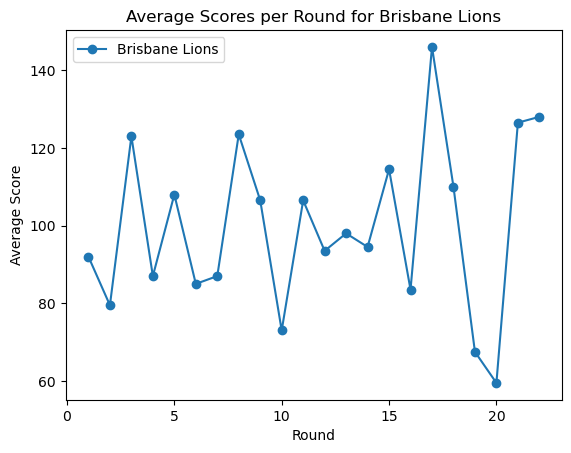

In [15]:
# Calculate average scores for each round
brisbane_avg_scores_per_round = brisbane_data.groupby('round')['home_team_score'].mean()

# Plot average scores per round for Brisbane Lions
plt.plot(brisbane_avg_scores_per_round, marker='o', label='Brisbane Lions')
plt.xlabel('Round')
plt.ylabel('Average Score')
plt.title('Average Scores per Round for Brisbane Lions')
plt.legend()
plt.show()


In [16]:
# Convert home team scores and away team scores into NumPy arrays
bh_pd_array = np.array(brisbane_data["home_team_score"])
ba_pd_array = np.array(brisbane_data["away_team_score"])

# Reshape the Brisbane home team scores array into a 2D array with one column
new_bhpd_array = bh_pd_array.reshape(-1, 1)

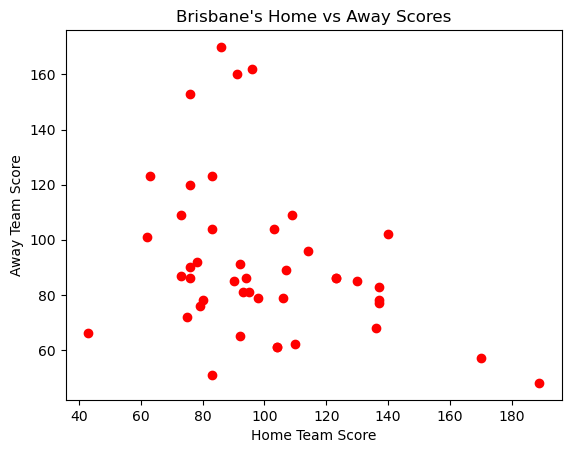

In [17]:
# Plot the home team scores against the away team scores using red dots ('ro')
plt.plot(new_bhpd_array, ba_pd_array, 'ro')

# Set the title of the plot
plt.title("Brisbane's Home vs Away Scores")

# Set the labels for x and y axes
plt.xlabel("Home Team Score")
plt.ylabel("Away Team Score")

# Display the plot
plt.show()


## Analysis of Adelaide's performance in away matches, showing the points difference and the number of wins and losses.

In [44]:
# Initialize variables to count home wins, losses, and draws for Port Adelaide
ahome_win_count = 0
ahome_loss_count = 0
ahome_draw_count = 0

# Initialize variables to count away wins, losses, and draws for Port Adelaide
aaway_win_count = 0
aaway_loss_count = 0
aaway_draw_count = 0

# Initialize line count to iterate through the dataset
line_count = 0

# Initialize list to store points differences
apd = []

# Loop through each match (assuming there are 44 matches)
while line_count < 44:
    try:
        # Check if the home team in the current match is "Port Adelaide"
        if portadelaidelist[line_count][1] == "Port Adelaide":
            # Calculate points difference for home matches and append to the list
            home_difference = portadelaidelist[line_count][2] - portadelaidelist[line_count][4]
            apd.append(home_difference)
            # Update counts for home wins, losses, and draws
            if home_difference > 0:
                ahome_win_count += 1
            elif home_difference < 0:
                ahome_loss_count += 1
            else:
                ahome_draw_count += 1
        else:
            # Calculate points difference for away matches
            away_difference = portadelaidelist[line_count][4] - portadelaidelist[line_count][2]
            apd.append(away_difference)
            # Update counts for away wins, losses, and draws
            if away_difference > 0:
                aaway_win_count += 1
            elif away_difference < 0:
                aaway_loss_count += 1
            else:
                aaway_draw_count += 1
        line_count += 1
    except IndexError:
        # Handle IndexError (index out of range)
        print("Error: Index out of range. Check the data format.")
        break
    except Exception as e:
        # Handle other exceptions
        print(f"An error occurred: {e}")
        break

# Print the points difference list and counts of home and away wins, losses, and draws for Port Adelaide
print("Points Difference:", apd)
print('\n')
print('Home Wins for Port Adelaide:', ahome_win_count)
print('Home Losses for Port Adelaide:', ahome_loss_count)
print('Home Draws for Port Adelaide:', ahome_draw_count)
print('\n')
print('Away Wins for Port Adelaide:', aaway_win_count)
print('Away Losses for Port Adelaide:', aaway_loss_count)
print('Away Draws for Port Adelaide:', aaway_draw_count)

Points Difference: [-48, -10, 57, 30, 12, 27, -27, 54, 50, 25, 49, 42, 39, -1, 15, 64, 1, 4, 44, 14, 20, 16, 96, 3, 81, -53, 55, 17, -32, -92, 78, 4, -37, 72, 10, 46, 83, 52, 26, -40, 73, 86, 37, 25]


Home Wins for Port Adelaide: 20
Home Losses for Port Adelaide: 2
Home Draws for Port Adelaide: 0


Away Wins for Port Adelaide: 15
Away Losses for Port Adelaide: 7
Away Draws for Port Adelaide: 0


In [19]:
a_home_points_difference = []
a_away_points_difference = []

# Iterate through each match
for match in range(len(portadelaide_data)):
    # Check if Brisbane Lions is the home team
    if portadelaide_data.iloc[match]['home_team'] == 'Port Adelaide':
        # Calculate home points difference
        home_difference = portadelaide_data.iloc[match]['home_team_score'] - portadelaide_data.iloc[match]['away_team_score']
        a_home_points_difference.append(home_difference)
    else:
        # Calculate away points difference
        away_difference = portadelaide_data.iloc[match]['away_team_score'] - brisbane_data.iloc[match]['home_team_score']
        a_away_points_difference.append(away_difference)

# Print out home and away points difference separately
print("Home Points Difference:", a_home_points_difference)
print("Away Points Difference:", a_away_points_difference)


Home Points Difference: [-10, 57, 27, 54, 25, 49, 39, 64, 44, 14, 16, 96, 81, 55, 17, -32, 78, 4, 72, 83, 26, 73]
Away Points Difference: [-30, 19, -28, -14, 70, 8, -6, 15, 1, -53, 1, 35, -8, -92, -37, 20, -21, 32, -4, 104, -23, -85]


In [46]:
pa_home_points_wins = []
pa_home_points_losses = []
pa_home_points_draws = []

pa_away_points_wins = []
pa_away_points_losses = []
pa_away_points_draws = []

# Iterate through each match
for match in range(len(portadelaide_data)):
    # Check if Port Adelaide is the home team
    if portadelaide_data.iloc[match]['home_team'] == 'Port Adelaide':
        # Calculate home points difference
        home_difference = portadelaide_data.iloc[match]['home_team_score'] - portadelaide_data.iloc[match]['away_team_score']
        if home_difference > 0:
            pa_home_points_wins.append(home_difference)
        elif home_difference < 0:
            pa_home_points_losses.append(home_difference)
        else:
            pa_home_points_draws.append(home_difference)
    else:
        # Calculate away points difference
        away_difference = portadelaide_data.iloc[match]['away_team_score'] - portadelaide_data.iloc[match]['home_team_score']
        if away_difference > 0:
            pa_away_points_wins.append(away_difference)
        elif away_difference < 0:
            pa_away_points_losses.append(away_difference)
        else:
            pa_away_points_draws.append(away_difference)

# Print out away points when Port Adelaide wins, loses, and draws
print("Away Points when Port Adelaide wins:", pa_away_points_wins)
print("Away Points when Port Adelaide loses:", pa_away_points_losses)
print("Away Points when Port Adelaide draws:", pa_away_points_draws)

print('\n')

# Print out home points when Port Adelaide wins, loses, and draws
print("Home Points when Port Adelaide wins:", pa_home_points_wins)
print("Home Points when Port Adelaide loses:", pa_home_points_losses)
print("Home Points when Port Adelaide draws:", pa_home_points_draws)

Away Points when Port Adelaide wins: [30, 12, 50, 42, 15, 1, 4, 20, 3, 10, 46, 52, 86, 37, 25]
Away Points when Port Adelaide loses: [-48, -27, -1, -53, -92, -37, -40]
Away Points when Port Adelaide draws: []


Home Points when Port Adelaide wins: [57, 27, 54, 25, 49, 39, 64, 44, 14, 16, 96, 81, 55, 17, 78, 4, 72, 83, 26, 73]
Home Points when Port Adelaide loses: [-10, -32]
Home Points when Port Adelaide draws: []


## Port Adelaide's Statistics

In [47]:
# Calculate average scores
portadelaide_avg_score = portadelaide_data['home_team_score'].mean()

# Total wins
portadelaide_total_wins = portadelaide_data[portadelaide_data['home_team_score'] > portadelaide_data['away_team_score']]['home_team_score'].count()

# Total losses
portadelaide_total_losses = portadelaide_data[portadelaide_data['home_team_score'] < portadelaide_data['away_team_score']]['home_team_score'].count()

# Total draws
portadelaide_total_draws = portadelaide_data[portadelaide_data['home_team_score'] == portadelaide_data['away_team_score']]['home_team_score'].count()

# Print statistics for Port Adelaide
print("Port Adelaide Statistics:")
print("Average Score:", portadelaide_avg_score)
print("Total Wins:", portadelaide_total_wins)
print("Total Losses:", portadelaide_total_losses)
print("Total Draws:", portadelaide_total_draws)

Port Adelaide Statistics:
Average Score: 102.43181818181819
Total Wins: 27
Total Losses: 17
Total Draws: 0


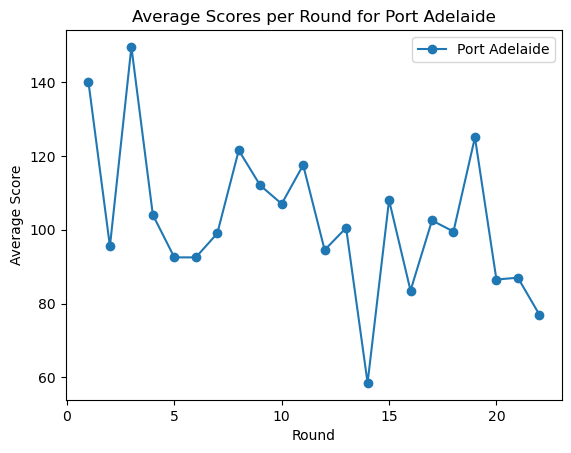

In [49]:
# Calculate average scores for each round
portadelaide_avg_scores_per_round = portadelaide_data.groupby('round')['home_team_score'].mean()

# Plot average scores per round for Port Adelaide
plt.plot(portadelaide_avg_scores_per_round, marker='o', label='Port Adelaide')
plt.xlabel('Round')
plt.ylabel('Average Score')
plt.title('Average Scores per Round for Port Adelaide')
plt.legend()
plt.show()

In [50]:
# Convert home team scores and away team scores into NumPy arrays
ah_pd_array = np.array(portadelaide_data["home_team_score"])
aa_pd_array = np.array(portadelaide_data["away_team_score"])

# Reshape the Brisbane home team scores array into a 2D array with one column
new_ahpd_array = ah_pd_array.reshape(-1, 1)

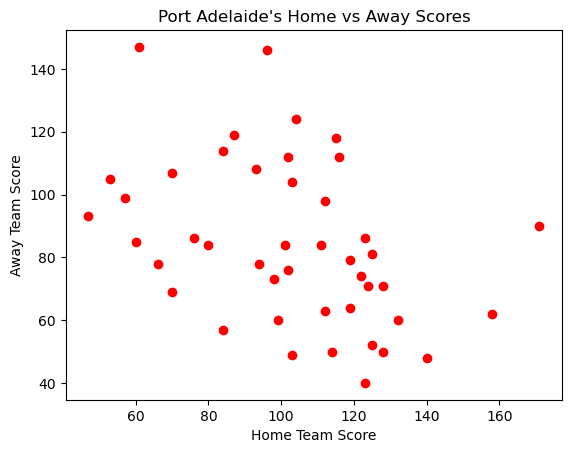

In [51]:
# Plot the home team scores against the away team scores using red dots ('ro')
plt.plot(new_ahpd_array, aa_pd_array, 'ro')

# Set the title of the plot
plt.title("Port Adelaide's Home vs Away Scores")

# Set the labels for x and y axes
plt.xlabel("Home Team Score")
plt.ylabel("Away Team Score")

# Display the plot
plt.show()


# Bar Chart Showing the Points difference of the Teams for each Round.

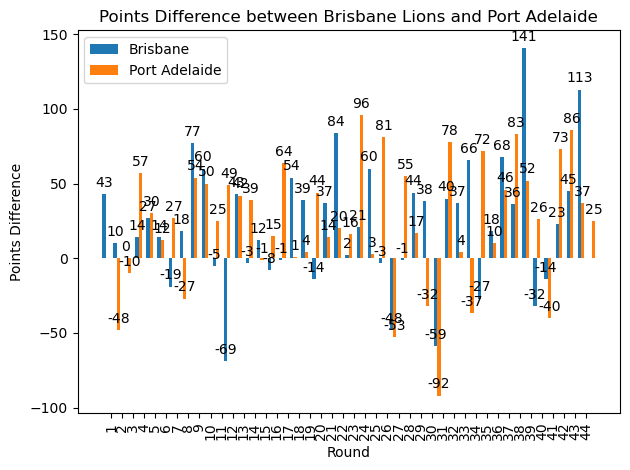

In [67]:
# Define the rounds as the x-axis tick labels
rounds = list(range(1, len(bpd) + 1))

# Define the width of the bars and the spacing between them
width = 0.3  # Adjust the width of the bars
spacing = 1.0  # Adjust the spacing between the bars

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the points difference for Brisbane Lions and Port Adelaide with increased spacing
rects1 = ax.bar([r - (width + spacing) / 2 for r in rounds], bpd, width, label='Brisbane')
rects2 = ax.bar([r + (width + spacing) / 2 for r in rounds], apd, width, label='Port Adelaide')

# Adding labels and title
ax.set_ylabel('Points Difference')
ax.set_xlabel('Round')
ax.set_title('Points Difference between Brisbane Lions and Port Adelaide')
ax.set_xticks(rounds)
ax.set_xticklabels(rounds, rotation=90)  # Rotate x-axis labels by 90 degrees
ax.legend()

# Adding labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.tight_layout()
plt.show()

In [75]:
# Initialize an empty list to store the win-loss results
win_loss_results = []

# Iterate over each match in the list
for match in brisbanelist:
    # Check if Brisbane is the home team
    if match[1] == "Brisbane":
        # Calculate points difference for home matches
        points_difference = match[2] - match[4]
        # Check if Brisbane won the match
        if points_difference > 0:
            win_loss_results.append(1)  # Brisbane won
        else:
            win_loss_results.append(0)  # Brisbane lost
    else:
        # Calculate points difference for away matches
        points_difference = match[4] - match[2]
        # Check if Brisbane won the match
        if points_difference > 0:
            win_loss_results.append(1)  # Brisbane won
        else:
            win_loss_results.append(0)  # Brisbane lost

# Convert the win-loss results list to a numpy array
win_loss_results = np.array(win_loss_results)

# Assuming you have a column named 'win_loss' in your dataframe
brisbane_data['win_loss'] = win_loss_results

# Print the first few rows of the dataframe with the 'win_loss' column
print(brisbane_data.head())

   round      home_team  home_team_score         away_team  away_team_score  \
0      1       Brisbane              104          Essendon               61   
1      2  Port Adelaide               76          Brisbane               86   
2      3      Kangaroos              109          Brisbane              109   
3      4       Brisbane               95       Collingwood               81   
4      5       Brisbane              106  Western Bulldogs               79   

   win_loss  
0         1  
1         1  
2         0  
3         1  
4         1  


In [76]:
# Initialize an empty list to store the win-loss results
win_loss_results = []

# Iterate over each match in the list
for match in portadelaidelist:
    # Check if Brisbane is the home team
    if match[1] == "Port Adelaide":
        # Calculate points difference for home matches
        points_difference = match[2] - match[4]
        # Check if Brisbane won the match
        if points_difference > 0:
            win_loss_results.append(1)  # Brisbane won
        else:
            win_loss_results.append(0)  # Brisbane lost
    else:
        # Calculate points difference for away matches
        points_difference = match[4] - match[2]
        # Check if Brisbane won the match
        if points_difference > 0:
            win_loss_results.append(1)  # Brisbane won
        else:
            win_loss_results.append(0)  # Brisbane lost

# Convert the win-loss results list to a numpy array
win_loss_results = np.array(win_loss_results)

# Assuming you have a column named 'win_loss' in your dataframe
portadelaide_data['win_loss'] = win_loss_results

# Print the first few rows of the dataframe with the 'win_loss' column
print(portadelaide_data.head())

   round      home_team  home_team_score      away_team  away_team_score  \
0      1     West Coast              122  Port Adelaide               74   
1      2  Port Adelaide               76       Brisbane               86   
2      3  Port Adelaide              128       Hawthorn               71   
3      4        Carlton               84  Port Adelaide              114   
4      5       Adelaide               66  Port Adelaide               78   

   win_loss  
0         0  
1         0  
2         1  
3         1  
4         1  


## Statistics

In [42]:
# Calculate average scores for each team in each season
brisbane_avg_scores = brisbane_data.groupby('round').agg({'home_team_score': 'mean', 'away_team_score': 'mean'})
portadelaide_avg_scores = portadelaide_data.groupby('round').agg({'home_team_score': 'mean', 'away_team_score': 'mean'})

# Calculate winning percentages for each team in each season
brisbane_winning_percentage = (brisbane_data['home_team_score'] > brisbane_data['away_team_score']).mean()
portadelaide_winning_percentage = (portadelaide_data['home_team_score'] > portadelaide_data['away_team_score']).mean()

# Calculate margins of victory for each team in each season
brisbane_data['margin_of_victory'] = brisbane_data['home_team_score'] - brisbane_data['away_team_score']
portadelaide_data['margin_of_victory'] = portadelaide_data['home_team_score'] - portadelaide_data['away_team_score']
brisbane_avg_margin = brisbane_data['margin_of_victory'].mean()
portadelaide_avg_margin = portadelaide_data['margin_of_victory'].mean()

# Print the calculated statistics
print("Brisbane Average Scores per Round:")
print(brisbane_avg_scores.head())

print("\nPort Adelaide Average Scores per Round:")
print(portadelaide_avg_scores.head())

print("\nBrisbane Winning Percentage:", brisbane_winning_percentage)
print("Port Adelaide Winning Percentage:", portadelaide_winning_percentage)

print("\nBrisbane Average Margin of Victory:", brisbane_avg_margin)
print("Port Adelaide Average Margin of Victory:", portadelaide_avg_margin)


Brisbane Average Scores per Round:
       home_team_score  away_team_score
round                                  
1                 92.0             69.5
2                 79.5             95.0
3                123.0             93.0
4                 87.0             78.5
5                108.0             70.5

Port Adelaide Average Scores per Round:
       home_team_score  away_team_score
round                                  
1                140.0             68.0
2                 95.5            102.0
3                149.5             80.5
4                104.0             92.5
5                 92.5             71.0

Brisbane Winning Percentage: 0.6136363636363636
Port Adelaide Winning Percentage: 0.6136363636363636

Brisbane Average Margin of Victory: 8.25
Port Adelaide Average Margin of Victory: 18.113636363636363


In [33]:
# 1. Calculate Average Scores
brisbane_avg_home_score = brisbane_data[brisbane_data['home_team'] == 'Brisbane']['home_team_score'].mean()
brisbane_avg_away_score = brisbane_data[brisbane_data['away_team'] == 'Brisbane']['away_team_score'].mean()

portadelaide_avg_home_score = portadelaide_data[portadelaide_data['home_team'] == 'Port Adelaide']['home_team_score'].mean()
portadelaide_avg_away_score = portadelaide_data[portadelaide_data['away_team'] == 'Port Adelaide']['away_team_score'].mean()

# 2. Calculate Win Rates
brisbane_total_matches = len(brisbane_data)
brisbane_home_wins = len(brisbane_data[(brisbane_data['home_team'] == 'Brisbane') & (brisbane_data['home_team_score'] > brisbane_data['away_team_score'])])
brisbane_away_wins = len(brisbane_data[(brisbane_data['away_team'] == 'Brisbane') & (brisbane_data['away_team_score'] > brisbane_data['home_team_score'])])
brisbane_total_wins = brisbane_home_wins + brisbane_away_wins
brisbane_win_rate = (brisbane_total_wins / brisbane_total_matches) * 100

portadelaide_total_matches = len(portadelaide_data)
portadelaide_home_wins = len(portadelaide_data[(portadelaide_data['home_team'] == 'Port Adelaide') & (portadelaide_data['home_team_score'] > portadelaide_data['away_team_score'])])
portadelaide_away_wins = len(portadelaide_data[(portadelaide_data['away_team'] == 'Port Adelaide') & (portadelaide_data['away_team_score'] > portadelaide_data['home_team_score'])])
portadelaide_total_wins = portadelaide_home_wins + portadelaide_away_wins
portadelaide_win_rate = (portadelaide_total_wins / portadelaide_total_matches) * 100

# 3. Calculate Goal Differentials
brisbane_goals_scored = brisbane_data['home_team_score'].sum() + brisbane_data['away_team_score'].sum()
brisbane_goals_conceded = portadelaide_data['home_team_score'].sum() + portadelaide_data['away_team_score'].sum()
brisbane_goal_differential = brisbane_goals_scored - brisbane_goals_conceded

portadelaide_goals_scored = portadelaide_data['home_team_score'].sum() + portadelaide_data['away_team_score'].sum()
portadelaide_goals_conceded = brisbane_data['home_team_score'].sum() + brisbane_data['away_team_score'].sum()
portadelaide_goal_differential = portadelaide_goals_scored - portadelaide_goals_conceded

# Print the calculated metrics
print("Brisbane Lions:")
print("Average Home Score:", brisbane_avg_home_score)
print("Average Away Score:", brisbane_avg_away_score)
print("Win Rate:", brisbane_win_rate)
print("Goal Differential:", brisbane_goal_differential)

print("\nPort Adelaide:")
print("Average Home Score:", portadelaide_avg_home_score)
print("Average Away Score:", portadelaide_avg_away_score)
print("Win Rate:", portadelaide_win_rate)
print("Goal Differential:", portadelaide_goal_differential)


Brisbane Lions:
Average Home Score: 115.76190476190476
Average Away Score: 100.04545454545455
Win Rate: 65.9090909090909
Goal Differential: 190

Port Adelaide:
Average Home Score: 113.95454545454545
Average Away Score: 97.04545454545455
Win Rate: 79.54545454545455
Goal Differential: -190


## Performance Comparison in Home and Away Matches 

In [34]:
# Calculate Average Scores for Home Matches
brisbane_avg_home_score = brisbane_data[brisbane_data['home_team'] == 'Brisbane']['home_team_score'].mean()
portadelaide_avg_home_score = portadelaide_data[portadelaide_data['home_team'] == 'Port Adelaide']['home_team_score'].mean()

# Calculate Average Scores for Away Matches
brisbane_avg_away_score = brisbane_data[brisbane_data['away_team'] == 'Brisbane']['away_team_score'].mean()
portadelaide_avg_away_score = portadelaide_data[portadelaide_data['away_team'] == 'Port Adelaide']['away_team_score'].mean()

# Calculate Win Rates for Home Matches
brisbane_home_matches = brisbane_data[brisbane_data['home_team'] == 'Brisbane']
brisbane_home_wins = len(brisbane_home_matches[brisbane_home_matches['home_team_score'] > brisbane_home_matches['away_team_score']])
brisbane_home_matches_total = len(brisbane_home_matches)
brisbane_home_win_rate = (brisbane_home_wins / brisbane_home_matches_total) * 100

portadelaide_home_matches = portadelaide_data[portadelaide_data['home_team'] == 'Port Adelaide']
portadelaide_home_wins = len(portadelaide_home_matches[portadelaide_home_matches['home_team_score'] > portadelaide_home_matches['away_team_score']])
portadelaide_home_matches_total = len(portadelaide_home_matches)
portadelaide_home_win_rate = (portadelaide_home_wins / portadelaide_home_matches_total) * 100

# Calculate Win Rates for Away Matches
brisbane_away_matches = brisbane_data[brisbane_data['away_team'] == 'Brisbane']
brisbane_away_wins = len(brisbane_away_matches[brisbane_away_matches['away_team_score'] > brisbane_away_matches['home_team_score']])
brisbane_away_matches_total = len(brisbane_away_matches)
brisbane_away_win_rate = (brisbane_away_wins / brisbane_away_matches_total) * 100

portadelaide_away_matches = portadelaide_data[portadelaide_data['away_team'] == 'Port Adelaide']
portadelaide_away_wins = len(portadelaide_away_matches[portadelaide_away_matches['away_team_score'] > portadelaide_away_matches['home_team_score']])
portadelaide_away_matches_total = len(portadelaide_away_matches)
portadelaide_away_win_rate = (portadelaide_away_wins / portadelaide_away_matches_total) * 100

# Print the comparison results
print("Comparison of Performance in Home Matches:")
print("Brisbane Lions - Average Home Score:", brisbane_avg_home_score, " | Win Rate:", brisbane_home_win_rate, "%")
print("Port Adelaide - Average Home Score:", portadelaide_avg_home_score, " | Win Rate:", portadelaide_home_win_rate, "%")

print("\nComparison of Performance in Away Matches:")
print("Brisbane Lions - Average Away Score:", brisbane_avg_away_score, " | Win Rate:", brisbane_away_win_rate, "%")
print("Port Adelaide - Average Away Score:", portadelaide_avg_away_score, " | Win Rate:", portadelaide_away_win_rate, "%")


Comparison of Performance in Home Matches:
Brisbane Lions - Average Home Score: 115.76190476190476  | Win Rate: 80.95238095238095 %
Port Adelaide - Average Home Score: 113.95454545454545  | Win Rate: 90.9090909090909 %

Comparison of Performance in Away Matches:
Brisbane Lions - Average Away Score: 100.04545454545455  | Win Rate: 54.54545454545454 %
Port Adelaide - Average Away Score: 97.04545454545455  | Win Rate: 68.18181818181817 %


In [86]:
# Calculate the number of wins and losses for Brisbane and Port Adelaide
bwin_counts = (brisbane_data['win_loss'] == 1).sum()
bloss_counts = (brisbane_data['win_loss'] == 0).sum()

awin_counts = (portadelaide_data['win_loss'] == 1).sum()
aloss_counts = (portadelaide_data['win_loss'] == 0).sum()

# Calculate points difference for Brisbane
brisbane_data['points_difference'] = brisbane_data['home_team_score'] - brisbane_data['away_team_score']

# Calculate points difference for Port Adelaide
portadelaide_data['points_difference'] = portadelaide_data['away_team_score'] - portadelaide_data['home_team_score']

# Extract the points difference for wins and losses
b_win_points = brisbane_data.loc[brisbane_data['win_loss'] == 1, 'points_difference'].tolist()
b_loss_points = brisbane_data.loc[brisbane_data['win_loss'] == 0, 'points_difference'].tolist()

a_win_points = portadelaide_data.loc[portadelaide_data['win_loss'] == 1, 'points_difference'].tolist()
a_loss_points = portadelaide_data.loc[portadelaide_data['win_loss'] == 0, 'points_difference'].tolist()

# Print the results
print("Brisbane Wins:", bwin_counts)
print("Brisbane Losses:", bloss_counts)
print("Brisbane Winning Points:", b_win_points)
print("Brisbane Losing Points:", b_loss_points)
print('\n')
print("Port Adelaide Wins:", awin_counts)
print("Port Adelaide Losses:", aloss_counts)
print("Port Adelaide Winning Points:", a_win_points)
print("Port Adelaide Losing Points:", a_loss_points)

Brisbane Wins: 29
Brisbane Losses: 15
Brisbane Winning Points: [43, -10, 14, 27, -14, 18, -77, -60, 43, 12, 54, -39, 37, -84, 2, -21, 60, -44, 38, -40, 37, -66, 18, 68, -36, 141, -23, 45, 113]
Brisbane Losing Points: [0, 19, 5, -69, 3, 8, -1, -14, 3, 48, 1, 59, 27, 32, -14]


Port Adelaide Wins: 35
Port Adelaide Losses: 9
Port Adelaide Winning Points: [-57, 30, 12, -27, -54, 50, -25, -49, 42, -39, 15, -64, 1, 4, -44, -14, 20, -16, -96, 3, -81, -55, -17, -78, -4, -72, 10, 46, -83, 52, -26, -73, 86, 37, 25]
Port Adelaide Losing Points: [-48, 10, -27, -1, -53, 32, -92, -37, -40]


## Head-to-Head Analysis between Brisbane Lions and Port Adelaide

In [35]:
# Calculate the number of matches where Brisbane Lions played as the home team against Port Adelaide
brisbane_home_vs_port_matches = len(brisbane_data[(brisbane_data['home_team'] == 'Brisbane') & (brisbane_data['away_team'] == 'Port Adelaide')])

# Calculate the number of matches where Brisbane Lions played as the away team against Port Adelaide
brisbane_away_vs_port_matches = len(brisbane_data[(brisbane_data['away_team'] == 'Brisbane') & (brisbane_data['home_team'] == 'Port Adelaide')])

# Calculate the number of matches where Port Adelaide played as the home team against Brisbane Lions
port_home_vs_brisbane_matches = len(portadelaide_data[(portadelaide_data['home_team'] == 'Port Adelaide') & (portadelaide_data['away_team'] == 'Brisbane')])

# Calculate the number of matches where Port Adelaide played as the away team against Brisbane Lions
port_away_vs_brisbane_matches = len(portadelaide_data[(portadelaide_data['away_team'] == 'Port Adelaide') & (portadelaide_data['home_team'] == 'Brisbane')])

# Calculate the number of wins, losses, and draws for each team in their head-to-head matchups
brisbane_wins = len(brisbane_data[((brisbane_data['home_team'] == 'Brisbane') & (brisbane_data['away_team'] == 'Port Adelaide') & (brisbane_data['home_team_score'] > brisbane_data['away_team_score'])) |
                                  ((brisbane_data['away_team'] == 'Brisbane') & (brisbane_data['home_team'] == 'Port Adelaide') & (brisbane_data['away_team_score'] > brisbane_data['home_team_score']))])

port_wins = len(portadelaide_data[((portadelaide_data['home_team'] == 'Port Adelaide') & (portadelaide_data['away_team'] == 'Brisbane') & (portadelaide_data['home_team_score'] > portadelaide_data['away_team_score'])) |
                                   ((portadelaide_data['away_team'] == 'Port Adelaide') & (portadelaide_data['home_team'] == 'Brisbane') & (portadelaide_data['away_team_score'] > portadelaide_data['home_team_score']))])

draws = len(brisbane_data[((brisbane_data['home_team'] == 'Brisbane') & (brisbane_data['away_team'] == 'Port Adelaide') & (brisbane_data['home_team_score'] == brisbane_data['away_team_score'])) |
                          ((brisbane_data['away_team'] == 'Brisbane') & (brisbane_data['home_team'] == 'Port Adelaide') & (brisbane_data['away_team_score'] == brisbane_data['home_team_score']))])

# Print the head-to-head analysis results
print("Head-to-Head Analysis between Brisbane Lions and Port Adelaide during the 2004 season:")
print("Brisbane Lions vs. Port Adelaide:")
print("   Matches as Home Team:", brisbane_home_vs_port_matches)
print("   Matches as Away Team:", brisbane_away_vs_port_matches)
print("   Wins:", brisbane_wins)
print("   Losses:", port_wins)
print("   Draws:", draws)

print("\nPort Adelaide vs. Brisbane Lions:")
print("   Matches as Home Team:", port_home_vs_brisbane_matches)
print("   Matches as Away Team:", port_away_vs_brisbane_matches)
print("   Wins:", port_wins)
print("   Losses:", brisbane_wins)
print("   Draws:", draws)


Head-to-Head Analysis between Brisbane Lions and Port Adelaide during the 2004 season:
Brisbane Lions vs. Port Adelaide:
   Matches as Home Team: 2
   Matches as Away Team: 1
   Wins: 2
   Losses: 1
   Draws: 0

Port Adelaide vs. Brisbane Lions:
   Matches as Home Team: 1
   Matches as Away Team: 2
   Wins: 1
   Losses: 2
   Draws: 0


In [42]:
# Group the data by round number
round_grouped = brisbane_data.groupby('round')

# Calculate aggregate statistics for each round
round_statistics = round_grouped.agg({
    'home_team_score': 'mean',
    'away_team_score': 'mean',
    # Add other performance metrics here
})

# Display the aggregate statistics for each round
print(round_statistics)


       home_team_score  away_team_score
round                                  
1                 92.0             69.5
2                 79.5             95.0
3                123.0             93.0
4                 87.0             78.5
5                108.0             70.5
6                 85.0             91.5
7                 87.0             99.5
8                123.5             95.5
9                106.5            115.5
10                73.0            123.0
11               106.5             85.5
12                93.5            161.0
13                98.0             63.0
14                94.5             84.0
15               114.5             74.5
16                83.5             97.5
17               146.0             76.0
18               110.0             67.0
19                67.5             94.0
20                59.5             78.0
21               126.5             85.5
22               128.0            113.5


In [68]:
# Group the data by round number
round_grouped = portadelaide_data.groupby('round')

# Calculate aggregate statistics for each round
round_statistics = round_grouped.agg({
    'home_team_score': 'mean',
    'away_team_score': 'mean',
    # Add other performance metrics here
})

# Display the aggregate statistics for each round
print(round_statistics)


       home_team_score  away_team_score
round                                  
1                140.0             68.0
2                 95.5            102.0
3                149.5             80.5
4                104.0             92.5
5                 92.5             71.0
6                 92.5             70.5
7                 99.0            101.5
8                121.5             48.5
9                112.0             98.0
10               107.0             92.5
11               117.5             74.5
12                94.5             79.5
13               100.5             86.0
14                58.5             81.0
15               108.0             74.0
16                83.5             77.5
17               102.5             90.0
18                99.5             81.5
19               125.0             66.5
20                86.5            122.5
21                87.0            115.5
22                77.0             81.5


# Linear Regression Model

In [36]:
my_model = LinearRegression()

In [37]:
#my_model.fit(new_bhpd_array, apd_array)
#OR
my_model = LinearRegression().fit(new_bhpd_array, ba_pd_array)
my_model

LinearRegression()

In [39]:
# Convert home team scores and away team scores into NumPy arrays
bh_pd_array = np.array(brisbane_data["home_team_score"])
ba_pd_array = np.array(brisbane_data["away_team_score"])

# Calculate the difference between home team scores and away team scores
score_difference = bh_pd_array - ba_pd_array

# Reshape the Brisbane home team scores array into a 2D array with one column
new_bhpd_array = bh_pd_array.reshape(-1, 1)

# Initialize and fit a Linear Regression model to predict score difference
my_model = LinearRegression().fit(new_bhpd_array, score_difference)

# Calculate the coefficient of determination (R-squared value)
r_sq = my_model.score(new_bhpd_array, score_difference)
print("R-squared value:", r_sq)

R-squared value: 0.6705833724914259


In [88]:
# Calculate the score difference
score_difference = brisbane_data["home_team_score"] - brisbane_data["away_team_score"]

# Convert home team scores and score differences into NumPy arrays
bh_pd_array = np.array(brisbane_data["home_team_score"]).reshape(-1, 1)  # Reshape to a 2D array with one column
score_difference = np.array(score_difference)

# Initialize and fit a Linear Regression model to predict score difference
my_model = LinearRegression().fit(bh_pd_array, score_difference)

# Example prediction: Predict the score difference for a home team score of 90
home_team_score = np.array([[90]])  # Reshape to a 2D array with one column
predicted_difference = my_model.predict(home_team_score)

# Print the predicted score difference
print("Predicted Score Difference:", predicted_difference)

Predicted Score Difference: [-4.62061134]


In [40]:
# Convert home team scores and away team scores into NumPy arrays for Port Adelaide
ph_pd_array = np.array(portadelaide_data["home_team_score"])
pa_pd_array = np.array(portadelaide_data["away_team_score"])

# Calculate the difference between home team scores and away team scores for Port Adelaide
score_difference_pa = ph_pd_array - pa_pd_array

# Reshape the Port Adelaide home team scores array into a 2D array with one column
new_phpd_array = ph_pd_array.reshape(-1, 1)

# Initialize and fit a Linear Regression model to predict score difference for Port Adelaide
my_model_pa = LinearRegression().fit(new_phpd_array, score_difference_pa)

# Calculate the coefficient of determination (R-squared value) for Port Adelaide
r_sq_pa = my_model_pa.score(new_phpd_array, score_difference_pa)
print("R-squared value for Port Adelaide:", r_sq_pa)

R-squared value for Port Adelaide: 0.7182671627012261


In [89]:
# Calculate the score difference
score_difference = portadelaide_data["home_team_score"] - portadelaide_data["away_team_score"]

# Convert home team scores and score differences into NumPy arrays
ah_pd_array = np.array(portadelaide_data["home_team_score"]).reshape(-1, 1)  # Reshape to a 2D array with one column
score_difference = np.array(score_difference)

# Initialize and fit a Linear Regression model to predict score difference
my_model = LinearRegression().fit(ah_pd_array, score_difference)

# Example prediction: Predict the score difference for a home team score of 90
home_team_score = np.array([[90]])  # Reshape to a 2D array with one column
predicted_difference = my_model.predict(home_team_score)

# Print the predicted score difference
print("Predicted Score Difference:", predicted_difference)

Predicted Score Difference: [0.96921658]
